In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Data preparation

In [63]:
df = pd.read_csv("transfers.csv")


In [64]:
df.head()

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,16136,2026-07-01,26/27,417,123,OGC Nice,Retired,NaN,500000.0,Dante
1,1138758,2026-07-01,26/27,336,631,Sporting CP,Chelsea,52140000.0,45000000.0,Geovany Quenda
2,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
3,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
4,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia


## Basic information about dataset

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79646 entries, 0 to 79645
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            79646 non-null  int64  
 1   transfer_date        79646 non-null  object 
 2   transfer_season      79646 non-null  object 
 3   from_club_id         79646 non-null  int64  
 4   to_club_id           79646 non-null  int64  
 5   from_club_name       79646 non-null  object 
 6   to_club_name         79646 non-null  object 
 7   transfer_fee         51931 non-null  float64
 8   market_value_in_eur  49330 non-null  float64
 9   player_name          79646 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.1+ MB


In [66]:
df.dtypes

player_id                int64
transfer_date           object
transfer_season         object
from_club_id             int64
to_club_id               int64
from_club_name          object
to_club_name            object
transfer_fee           float64
market_value_in_eur    float64
player_name             object
dtype: object

In [67]:
df['transfer_date'] = pd.to_datetime(df['transfer_date'], errors='coerce')
df['transfer_season'] = df['transfer_season'].astype('category')

In [68]:
df.dtypes

player_id                       int64
transfer_date          datetime64[ns]
transfer_season              category
from_club_id                    int64
to_club_id                      int64
from_club_name                 object
to_club_name                   object
transfer_fee                  float64
market_value_in_eur           float64
player_name                    object
dtype: object

In [69]:
df.shape

(79646, 10)

In [70]:
df.columns

Index(['player_id', 'transfer_date', 'transfer_season', 'from_club_id',
       'to_club_id', 'from_club_name', 'to_club_name', 'transfer_fee',
       'market_value_in_eur', 'player_name'],
      dtype='object')

In [71]:
df.isnull().sum()

player_id                  0
transfer_date              0
transfer_season            0
from_club_id               0
to_club_id                 0
from_club_name             0
to_club_name               0
transfer_fee           27715
market_value_in_eur    30316
player_name                0
dtype: int64

### We analysis only cash-transfers

In [72]:
df['transfer_fee'] = df['transfer_fee'].fillna(0)
df['market_value_in_eur'] = df['market_value_in_eur'].fillna(0)

In [73]:
df.isnull().sum()

player_id              0
transfer_date          0
transfer_season        0
from_club_id           0
to_club_id             0
from_club_name         0
to_club_name           0
transfer_fee           0
market_value_in_eur    0
player_name            0
dtype: int64

In [74]:
df.duplicated().sum()

np.int64(0)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79646 entries, 0 to 79645
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   player_id            79646 non-null  int64         
 1   transfer_date        79646 non-null  datetime64[ns]
 2   transfer_season      79646 non-null  category      
 3   from_club_id         79646 non-null  int64         
 4   to_club_id           79646 non-null  int64         
 5   from_club_name       79646 non-null  object        
 6   to_club_name         79646 non-null  object        
 7   transfer_fee         79646 non-null  float64       
 8   market_value_in_eur  79646 non-null  float64       
 9   player_name          79646 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 5.5+ MB


In [76]:
df = df.copy()

In [77]:
df_cash = df[df['transfer_fee'] > 0].copy()

In [78]:
df_cash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9509 entries, 1 to 79425
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   player_id            9509 non-null   int64         
 1   transfer_date        9509 non-null   datetime64[ns]
 2   transfer_season      9509 non-null   category      
 3   from_club_id         9509 non-null   int64         
 4   to_club_id           9509 non-null   int64         
 5   from_club_name       9509 non-null   object        
 6   to_club_name         9509 non-null   object        
 7   transfer_fee         9509 non-null   float64       
 8   market_value_in_eur  9509 non-null   float64       
 9   player_name          9509 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 753.5+ KB


## Data analysis

In [79]:
df['transfer_fee'].describe()

count    7.964600e+04
mean     7.274292e+05
std      4.279180e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.800000e+08
Name: transfer_fee, dtype: float64

In [80]:
df['transfer_fee'].median()

np.float64(0.0)

### Top 10 Most expensive transfers

In [81]:
df.sort_values(by='transfer_fee', ascending=False).head(10)

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
47851,342229,2018-07-01,18/19,162,583,Monaco,Paris SG,180000000.0,120000000.0,Kylian Mbappé
50887,80444,2018-01-08,17/18,31,131,Liverpool,Barcelona,135000000.0,90000000.0,Philippe Coutinho
51801,288230,2017-08-25,17/18,16,131,Bor. Dortmund,Barcelona,135000000.0,33000000.0,Ousmane Dembélé
41214,462250,2019-07-03,19/20,294,13,Benfica,Atlético Madrid,127200000.0,70000000.0,João Félix
16528,648195,2023-01-31,22/23,294,631,Benfica,Chelsea,121000000.0,55000000.0,Enzo Fernández
40890,125781,2019-07-14,19/20,13,131,Atlético Madrid,Barcelona,120000000.0,130000000.0,Antoine Griezmann
26931,203460,2021-08-05,21/22,405,281,Aston Villa,Man City,117500000.0,65000000.0,Jack Grealish
12366,357662,2023-07-15,23/24,379,11,West Ham,Arsenal,116600000.0,90000000.0,Declan Rice
11354,687626,2023-08-14,23/24,1237,631,Brighton,Chelsea,116000000.0,75000000.0,Moisés Caicedo
26767,96341,2021-08-12,21/22,46,631,Inter,Chelsea,113000000.0,100000000.0,Romelu Lukaku


In [82]:
idx = df_cash.groupby('transfer_season', observed=True)['transfer_fee'].idxmax()

In [83]:
most_expensive_per_season = df_cash.loc[idx].sort_values(by='transfer_season')

In [84]:
cols = ['transfer_season', 'from_club_name', 'to_club_name', 'transfer_fee', 'player_name']
most_expensive_per_season[cols].head()

,transfer_season,from_club_name,to_club_name,transfer_fee,player_name
79425,02/03,Barcelona,Villarreal,750000.0,Pepe Reina
79113,04/05,Leeds,Newcastle,7400000.0,James Milner
78807,05/06,Sevilla FC,Real Madrid,27000000.0,Sergio Ramos
78261,06/07,Watford,Aston Villa,13200000.0,Ashley Young
77770,07/08,FC Porto,Real Madrid,30000000.0,Pepe


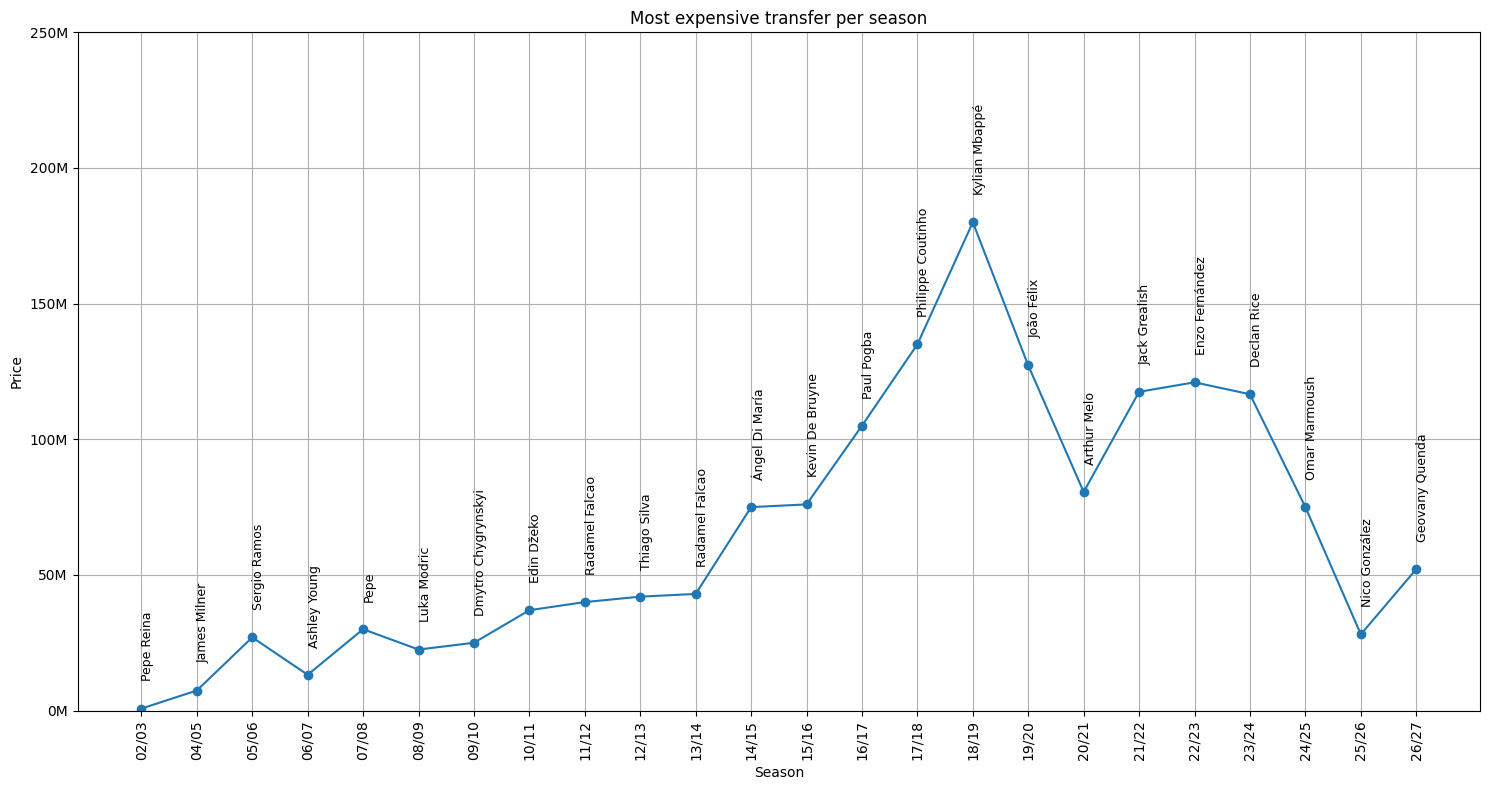

In [85]:
expensive_transfers = most_expensive_per_season[['transfer_season', 'transfer_fee', 'player_name']]
expensive_transfers = expensive_transfers.sort_values('transfer_season')

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(expensive_transfers['transfer_season'], expensive_transfers['transfer_fee'], marker='o', linestyle='-')
ax.set_title('Most expensive transfer per season')
ax.set_xlabel('Season')
ax.set_ylabel('Price')
ax.set_ylim(0, 25e7)
plt.xticks(rotation=90)
plt.grid(True)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

for i, row in expensive_transfers.iterrows():
    plt.text(row['transfer_season'], row['transfer_fee'] + 10e6, row['player_name'], rotation=90, fontsize=9, ha='left', va='bottom')

plt.tight_layout()
plt.show()

## Wnioski z analizy najdroższych transferów piłkarskich w sezonach 2002/03 – 2026/27

Na przestrzeni analizowanych sezonów widoczny jest wyraźny trend wzrostowy wartości najdroższych transferów. Od kwot rzędu kilku milionów euro na początku okresu 
(np. transfer Pepe Reiny w sezonie 02/03) ceny systematycznie rosły, osiągając szczyt w sezonie 18/19, kiedy transfer Kyliana Mbappé przekroczył 180 milionów euro. 
Był to punkt kulminacyjny całego okresu.

Po rekordowym transferze Mbappé zauważalny jest jednak trend większej zmienności – ceny w kolejnych sezonach nie utrzymywały już stałego wzrostu, a często były niższe niż w latach szczytu. 
Najdroższe transfery z sezonów 20/21–26/27, mimo że wciąż imponujące, nie osiągały rekordowych kwot z lat 17/18–18/19. Może to wskazywać na zmianę strategii finansowej klubów, które zaczęły ograniczać wydatki na transfery.

Warto również zauważyć, że spadki wartości po 2019 roku mogą być związane z czynnikami zewnętrznymi, takimi jak pandemia COVID-19, która wpłynęła na budżety wielu klubów. 
W ostatnich sezonach (24/25–26/27) najdroższe transfery są już znacznie tańsze, co może sugerować początek dłuższego trendu stabilizacji lub nawet spadku wartości na rynku transferowym.

### Uwzględnienie specyfiki ostatnich sezonów

Trzeba pamiętać, że okienko transferowe na sezon 25/26 wciąż trwa, więc dane dla tego sezonu mogą się jeszcze zmienić, jeśli dojdzie do kolejnych dużych transakcji. 
Z kolei najdroższy transfer przypisany do sezonu 26/27 dotyczy transakcji, w której kwota została zapłacona już teraz, ale piłkarz formalnie przejdzie do nowego klubu dopiero w przyszłym roku. 
Oznacza to, że wnioski dotyczące tych sezonów są tymczasowe i mogą ulec zmianie wraz z dalszym rozwojem sytuacji na rynku transferowym.

---

Ogólnie analiza pokazuje, że rynek transferowy przeszedł od powolnego wzrostu, przez okres gwałtownych zwyżek, aż do obecnej fazy zmienności i potencjalnej stabilizacji cen.


In [86]:
df_cash.isnull().sum()

player_id              0
transfer_date          0
transfer_season        0
from_club_id           0
to_club_id             0
from_club_name         0
to_club_name           0
transfer_fee           0
market_value_in_eur    0
player_name            0
dtype: int64

In [87]:
avg_transfer_per_season = df_cash.groupby("transfer_season")["transfer_fee"].mean().reset_index().sort_values('transfer_season').dropna()
avg_transfer_per_season.head()

C:\Users\wojdz\AppData\Local\Temp\ipykernel_11608\3859070360.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,transfer_season,transfer_fee
2,02/03,7.500000e+05
4,04/05,1.263909e+06
5,05/06,3.547917e+06
6,06/07,1.796579e+06
7,07/08,3.648330e+06


[]

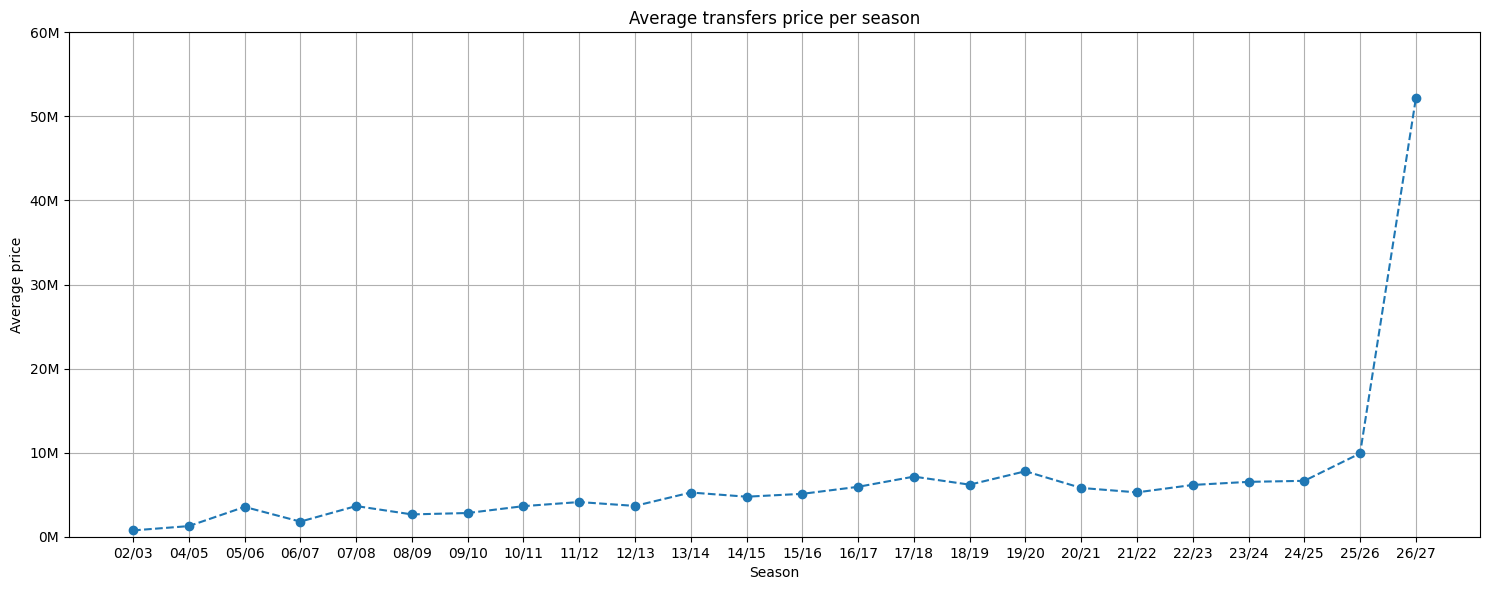

In [88]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(avg_transfer_per_season['transfer_season'], avg_transfer_per_season['transfer_fee'], marker='o', linestyle='--')
ax.set_title('Average transfers price per season')
ax.set_xlabel('Season')
ax.set_ylabel('Average price')
ax.set_ylim(0, 60e6)
ax.grid(True)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

fig.tight_layout()
plt.plot()

## Wnioski z analizy średnich cen transferów

- Na przestrzeni analizowanych sezonów widać **stały trend wzrostu średnich cen transferów**, zwłaszcza od sezonu 15/16, co odzwierciedla rosnące kwoty na rynku piłkarskim.

- **Sezony 25/26 i 26/27 wykazują ekstremalnie wysokie średnie ceny transferów**, jednak należy pamiętać, że **sezon 25/26 jeszcze trwa, a sezon 26/27 się jeszcze nie zaczął**. Wyjątkowo wysoka średnia wynika z faktu, że Chelsea zakontraktowała piłkarza z wyprzedzeniem – transfer został już zaksięgowany, ale zawodnik dołączy do klubu dopiero w przyszłym roku. W miarę realizacji kolejnych transakcji średnia powinna się **ustabilizować i uśrednić** do bardziej realistycznego poziomu.


## Transfers from and to club

In [89]:
club_pay = df['to_club_name'].value_counts().head(10)

In [90]:
club_sell = df['from_club_name'].value_counts().head(10)

In [91]:
mask_unknown = df.isin(['Unknown'])
df_unknown = df[mask_unknown.any(axis=1)]
df_unknown

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
1670,1367128,2025-01-15,24/25,75,6890,Unknown,Basaksehir,0.0,0.0,Abdoulaye Yoro
7669,1285176,2024-04-15,23/24,75,3654,Unknown,Kalmar FF,0.0,0.0,Vince Osuji
8577,1231401,2024-01-31,23/24,75,8158,Unknown,OGC Nice B,0.0,0.0,Victor Orakpo
10189,1185987,2023-09-14,23/24,75,73907,Unknown,Kayserispor U19,0.0,0.0,Mirkan Cevdet Buğurcu
10340,1240255,2023-09-05,23/24,75,81204,Unknown,Polissya U19,0.0,0.0,Oleksandr Ivanov
...,...,...,...,...,...,...,...,...,...,...
79110,19619,2004-07-21,04/05,75,34152,Unknown,Dynamo-3 Kyiv,0.0,0.0,Oleksandr Rybka
79236,129513,2004-07-01,04/05,75,38464,Unknown,FC Ardealul,0.0,0.0,Alexandru Maxim
79292,85969,2004-01-01,03/04,75,19605,Unknown,Spartak-Gorobyna,0.0,0.0,Oleksandr Bandura
79561,39152,2001-03-07,00/01,75,15108,Unknown,River Plate U20,0.0,0.0,Radamel Falcao


## Wnioski z analizy najaktywniejszych klubów i jakości danych

### Najaktywniejsze kluby kupujące i sprzedające

**Najwięcej kupujących (`to_club_name`):**
- Najwięcej transferów trafia do „Without Club” (1456 przypadków), co oznacza, że wielu zawodników nie przechodzi do żadnego klubu — w praktyce to często oznacza **wolnych agentów**, ale również **piłkarzy podpisujących pierwszy seniorski kontrakt**, których pierwszy klub w seniorskiej karierze jest rejestrowany jako „Without Club” (mniej znany klub, dla którego transfermarkt nie prowadzi statystyk).
- Wśród aktywnych klubów transferowych wyróżniają się m.in. Olympiacos, Inter, Genoa, Chelsea, AS Roma, Juventus i Benfica — drużyny znane z intensywnej aktywności na rynku transferowym.

**Najwięcej sprzedających (`from_club_name`):**
- Najczęściej zawodnicy odchodzą z „Without Club” (964 przypadki) — w tym kontekście oznacza to **piłkarzy odchodzących na emeryturę** lub którzy zostają bez klubu.
- Pojawienie się „Unknown” (258 przypadków) sugeruje również przypadki, w których piłkarz przechodzi do klubu **niezarejestrowanego w bazie danych** (np. amatorskiego, spoza rejestru lub z niekompletną dokumentacją).

---

### Problemy z jakością danych

Wysoka liczba wystąpień **„Unknown”** i „Without Club” w kolumnach `from_club_name` i `to_club_name` wskazuje, że dane zawierają sporo braków informacyjnych o pochodzeniu lub przeznaczeniu zawodników w transferach, ale też odzwierciedlają naturalne przypadki, takie jak:
- Pierwszy profesjonalny kontrakt piłkarza.
- Zakończenie kariery i przejście na emeryturę.
- Transfery z/do klubów spoza rejestru (np. z lig amatorskich lub krajów, gdzie nie ma kompletnych danych).

---

### Wnioski praktyczne

1. **Silna obecność „Unknown” i „Without Club”** oznacza, że duża część transferów dotyczy piłkarzy na ważnych etapach kariery — przechodzących na emeryturę, podpisujących pierwszy kontrakt lub zmieniających klub z/do mniej znanych drużyn.
   
2. **Najaktywniejsze kluby** w zestawieniu to zespoły znane z częstych transferów (m.in. Inter, Olympiacos, Genoa, Roma, Juventus), co potwierdza ich aktywność na rynku.

3. **Jakość danych wymaga uwzględnienia kontekstu sportowego** — w niektórych analizach warto odróżniać przypadki, gdzie „Without Club” oznacza pierwszy kontrakt, a gdzie koniec kariery, ponieważ mają one zupełnie inne znaczenie sportowe i finansowe.

4. Przy dalszych analizach (np. wartości transferów, średniego wieku przy transferze) warto rozważyć **dodatkowe oznaczanie przypadków „Unknown”/„Without Club” jako specjalne kategorie**, zamiast je usuwać — pozwoli to lepiej zrozumieć, jak wygląda kariera zawodników od debiutu po emeryturę.
